In [1]:
import numpy as np
import time
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

from astropy.table import Table
from astropy.io import fits
import astropy.cosmology
from astropy import units as u
from astropy.coordinates import SkyCoord

In [18]:
def pure_cut(table):
    
    idx_pure = np.where( (table['gaia_crf_source']==True) |
                         ((table['host_galaxy_flag']>0) & (table['host_galaxy_flag']<6)) |
                         (table['classlabel_dsc_joint']=='quasar') |
                         (table['vari_best_class_name']=='AGN') )[0]
    return idx_pure

In [20]:
data_gaia = Table.read('../data/gaia_panstarrs.fits', format='fits')

In [21]:
len(data_gaia)

6649162

In [22]:
idx_pure = pure_cut(data_gaia)
data = data_gaia[idx_pure]
len(data)

1942825

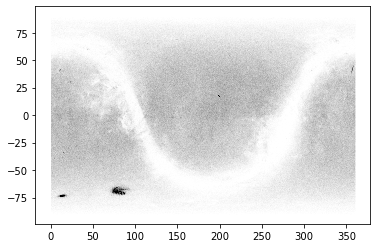

In [23]:
plt.scatter(data['ra'], data['dec'], s=0.01, alpha=0.01, color='k')

In [45]:
idx_ps = np.where(~np.isnan(g_mags))[0]
g_mags = data['g_mean_psf_mag']
len(idx_ps)

1476974

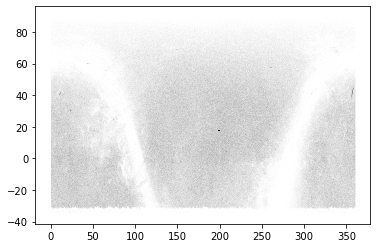

In [47]:
plt.scatter(data['ra'][idx_ps], data['dec'][idx_ps], s=0.03, alpha=0.01, color='k')

Text(0, 0.5, 'number in bin')

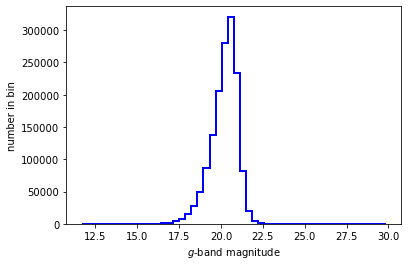

In [26]:
plt.hist(g_mags, histtype='step', lw=2, color='blue', bins=50)
plt.xlabel(r'$g$-band magnitude')
plt.ylabel('number in bin')

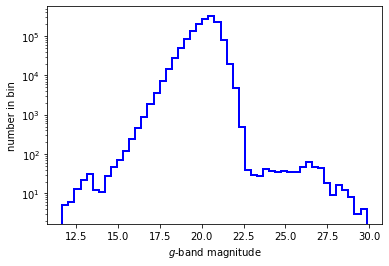

In [27]:
plt.hist(g_mags, histtype='step', lw=2, color='blue', bins=50)
plt.xlabel(r'$g$-band magnitude')
plt.ylabel('number in bin')
plt.yscale('log')

In [28]:
tab_sdss = Table.read('../data/SDSS_DR16Q_v4.fits', format = 'fits')

c1 = SkyCoord(ra=tab_sdss['RA']*u.degree, dec=tab_sdss['DEC']*u.degree, frame='icrs')   
c2 = SkyCoord(ra=data['ra'], dec=data['dec'], frame='icrs') 

#c2.match_to_catalog_sky(c1) 
x1 = c2.search_around_sky(c1, 1*u.arcsec)
x2 = c2.search_around_sky(c1, 2*u.arcsec)
x3 = c2.search_around_sky(c1, 3*u.arcsec)

In [29]:
# matched sample (~400,000)
data_sdss = data[x3[1]]

# with redshifts
data_sdss.add_column(tab_sdss['Z'][x3[0]], name='redshift_sdss')
data_sdss = data_sdss[data_sdss['redshift_sdss'] > 0]
len(data_sdss)

400543

In [49]:
gi_color = data_sdss['g_mean_psf_mag'] - data_sdss['i_mean_psf_mag']
gr_color = data_sdss['g_mean_psf_mag'] - data_sdss['r_mean_psf_mag']
iz_color = data_sdss['i_mean_psf_mag'] - data_sdss['z_mean_psf_mag']

Text(0, 0.5, 'Gaia redshift')

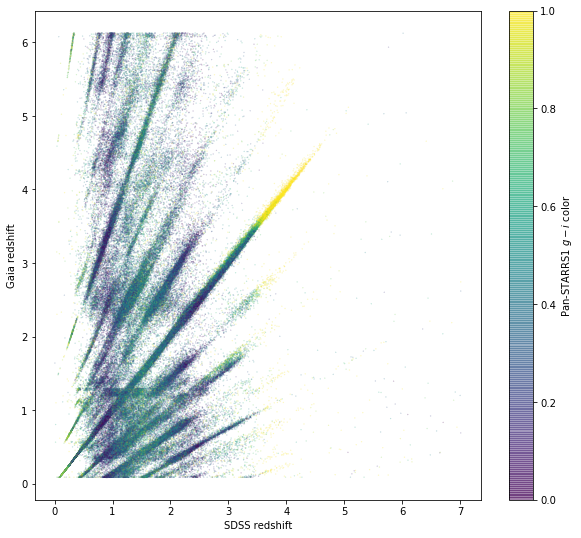

In [40]:
plt.figure(figsize=(10,9))
plt.scatter(data_sdss['redshift_sdss'], data_sdss['redshift_qsoc'], c=gi_color, s=0.05, alpha=0.5,
           vmin=0.0, vmax=1.0)
plt.colorbar(label=r'Pan-STARRS1 $g-i$ color')
plt.xlabel('SDSS redshift')
plt.ylabel('Gaia redshift')

Text(0, 0.5, 'Gaia redshift')

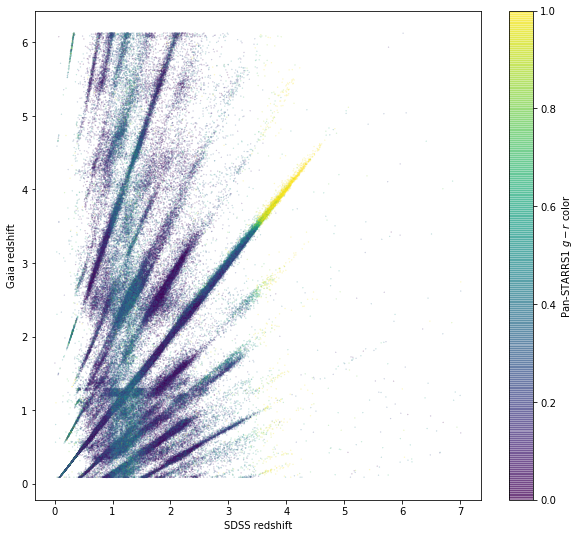

In [41]:
plt.figure(figsize=(10,9))
plt.scatter(data_sdss['redshift_sdss'], data_sdss['redshift_qsoc'], c=gr_color, s=0.05, alpha=0.5,
           vmin=0.0, vmax=1.0)
plt.colorbar(label=r'Pan-STARRS1 $g-r$ color')
plt.xlabel('SDSS redshift')
plt.ylabel('Gaia redshift')

Text(0, 0.5, 'Gaia redshift')

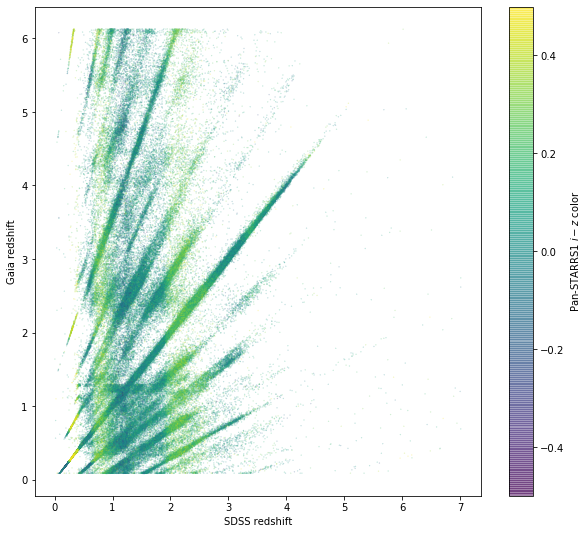

In [51]:
plt.figure(figsize=(10,9))
plt.scatter(data_sdss['redshift_sdss'], data_sdss['redshift_qsoc'], c=iz_color, s=0.05, alpha=0.5,
           vmin=-0.5, vmax=0.5)
plt.colorbar(label=r'Pan-STARRS1 $i-z$ color')
plt.xlabel('SDSS redshift')
plt.ylabel('Gaia redshift')

(-1, 2)

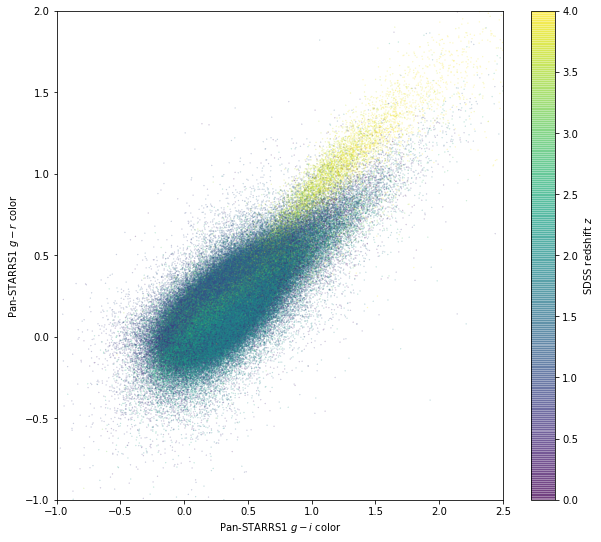

In [48]:
plt.figure(figsize=(10,9))
plt.scatter(gi_color, gr_color, c=data_sdss['redshift_sdss'], s=0.05, alpha=0.5,
           vmin=0.0, vmax=4.0)
plt.colorbar(label=r'SDSS redshift $z$')
plt.xlabel(r'Pan-STARRS1 $g-i$ color')
plt.ylabel(r'Pan-STARRS1 $g-r$ color')
plt.xlim(-1, 2.5)
plt.ylim(-1, 2)